# Stochastik-Skript

## beschreibende Statistik

einige einfache Statistische Werte

In [10]:
values = [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 7]

custom_quantil = 0.9


show_basics(values, custom_quantil)


WERT 			ERGEBNIS
________________________________________________________________________________________________________
Max 			7
Min 			1
Modalwert 		[3] ([4]-mal)		// auf mehrere Modalwerte aufpassen
Arithmetische Mittel 	3.0
Median 			3.0

25% Quartil 		2.0
50% Quartil 		3.0
75% Quartil 		4.0
90% Quantil 		4.0

Varianz 		2.8
Standardabweichung  	1.6733200530681511
Interquartilsabstand 	2
Spannweite 		6


### Häufigkeiten


 Wert  Absolute Häufigkeit  Relative Häufigkeit  Werte für Verteilungsfunktion
    1                    2             0.181818                       0.181818
    2                    2             0.181818                       0.363636
    3                    4             0.363636                       0.727273
    4                    2             0.181818                       0.909091
    7                    1             0.090909                       1.000000


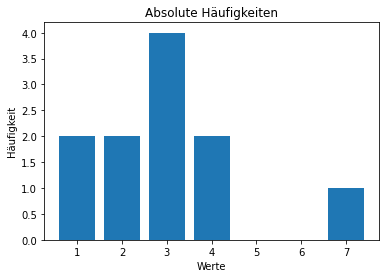

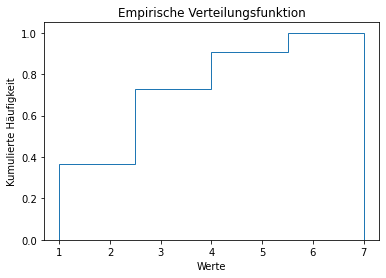

In [11]:
data = [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 7]


haeufigkeit_diskret(data)

## Multivariate Statistik

Lineare Korrelation

Korrelationskoeffizient: 0.7025547336014847


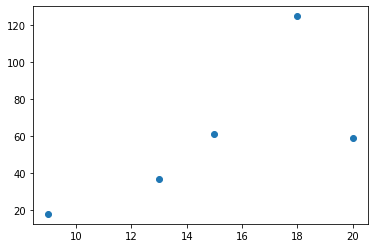

Regressionsgerade: f(x) = kx + d = 6.594594594594595x + -38.91891891891892
Bestimmtheitsmaß: R^2 = 0.4935831537058531 


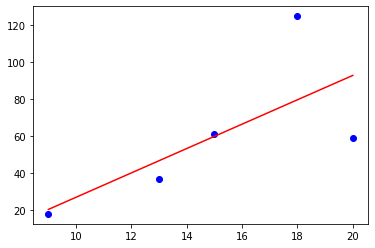

In [12]:
a = (9, 13, 15, 18, 20)
b = (18, 37, 61, 125, 59)

korr_scatter(a,b)

## Diskrete Wahrscheinlichkeiten

### Kombinatorik

+ Permutation ohne Wiederholung: "p" => hängt nur von n ab
+ Variation ohne Wiederholung: "vo"
+ Variation mit Wiederholung: "vm"
+ Kombination ohne Wiederholung: "ko"
+ Kombination mit Wiederholung: "km"

In [26]:
#Gesamtmenge
n = 100

#Objekte die gezogen werden
k = 5
type = "ko"

combinatorics(n,k,type)

Kombination ohne Wiederholung special.binom(n,k) 75287520.0


### diskrete Zufallsverteilungen

Bernoulli -Verteilung

    Mit Welcher Wahrscheinlichkeit tritt ein Erfolg bei einem Versuch ein?
    X ~ Ber(p)
    
    type = "ber"
    p = Erfolgswahrscheinlichkeit

Binomialverteilung
    
    Mit welcher Wahrscheinlichkeit treten k Erfolge in n Versuchen ein.
    X ~ Bin(n,p)
    
    type = "bin"
    n: Anzahl Versuche
    k: Anzahl Erfolge
    p: Erfolgswahrscheinlichkeit eines Versuchs

Geometrische Verteilung

    Wartezeit bis zum ersten Erfolg
    X ~ geom(p)

    type = "geom"
    n: Anzahl Versuche
    k: Nicht nötig, da nur bis zum ersten Erfolgreichen Versuch gerechnet wird
    p: Erfolgswahrscheinlichkeit eines Versuchs

Poissonverteilung

    Anzahl der Vorkommnisse in einem (Zeit) Intervall
    X ~ Po(lambda)

    type = "po"
    lam: Auftrittsrate (lambda)
    k: Anzahl der Ankünfte

Method:

    P(X = 3): pmf
    P(X <= 3):cdf Achtung: kleiner GLEICH
    P(X > 3): sf


In [18]:
type = "po"
method = "pmf"
n = 5
k = 7
p = 0.7
lam = 7


diskret(n,k,p,lam,type,method)


Beschreibung 	Formel 			Ergebnis
----------------------------------------------------------
Poisson
P(X = 7) 	poisson.pmf(7, 7) 	0.14900277967433773
Erwartungswert 	lambda 			7 
Varianz 	lambda 			7


## Kontinuierliche Wahrscheinlichkeiten

### stetige Zufallsverteilungen

Gleichverteilung

    X ~ U(a, b)
    type : "gv"
    a = minimaler Wert
    b = maximaler Wert
    c = gesuchter Wert  

Exponentialverteilung
    
    X ~ exp(lam)
    type = "exp"
    c = gesuchter Wert
    lam = Ankunftsrate

    Lambda gegeben

Normalverteilung

    X ~ N(my, sigma)
    type : "norm"
    my = Erwartungswert
    sigma = Standardabweichung
    c = Gesuchter Wert


METHOD

    P(X <= 3) = cdf
    P(X > 3) = sf
    x(quantil) = ppf Für Normalverteilung?

In [48]:
type = "gv"
method = "ppf"

a = 5
b = 300
c = 0.90

lam = 1/18

my = 180.3
sigma = 7.17


stetig(c, a, b, my, sigma, lam, method, type)


Beschreibung 		Ergebnis
--------------------------------------------------------------------
Gleichverteilung
x0.9 			275.0
Erwartungswert 		152.5 
Varianz 		7252.083333333333


# Hilfsprogramme

In [14]:
from xml.sax.handler import property_interning_dict
import numpy as np
import pandas as pd
from scipy import stats, special
from matplotlib import pyplot as plt
from scipy.stats import geom
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import uniform, expon, norm
import math

In [4]:
def show_basics(values, custom_quantil):
    """
        Prints basic statistical values
        :param values: List with numbers
        :param custom_quantil: calculate the quatile for a custom percentage
        :returns: None
    """
    values.sort()
    
    print("")
    print(f"WERT \t\t\tERGEBNIS")
    print("________________________________________________________________________________________________________")
    print(f"Max \t\t\t{max(values)}")
    print(f"Min \t\t\t{min(values)}")
    modalwert = stats.mode(values)
    print(f"Modalwert \t\t{modalwert.mode} ({modalwert.count}-mal)\t\t// auf mehrere Modalwerte aufpassen")
    print(f"Arithmetische Mittel \t{np.mean(values)}")
    print(f"Median \t\t\t{np.median(values)}\n")
    x25 = np.quantile(values, 0.25, method="averaged_inverted_cdf")
    x50 = np.quantile(values, 0.5, method="averaged_inverted_cdf")
    x75 = np.quantile(values, 0.75, method="averaged_inverted_cdf")
    xcustom = np.quantile(values, custom_quantil, method="averaged_inverted_cdf")
    print(f"25% Quartil \t\t{x25}")
    print(f"50% Quartil \t\t{x50}")
    print(f"75% Quartil \t\t{x75}")
    print(f"{int(custom_quantil*100)}% Quantil \t\t{xcustom}\n")
    print(f"Varianz \t\t{np.var(values, ddof=1)}")
    print(f"Standardabweichung  \t{np.std(values, ddof = 1)}")
    print(f"Interquartilsabstand \t{stats.iqr(values, interpolation='nearest')}")
    print(f"Spannweite \t\t{max(values) - min(values)}")


In [5]:
def haeufigkeit_diskret(data):
    """
    Berechnet und zeichnet absolute und relative Häufigkeiten
    :param data: Liste mit Werten
    """

    df = pd.DataFrame(data).value_counts().rename_axis("Wert").reset_index(name = "Absolute Häufigkeit")

    df["Relative Häufigkeit"] = df["Absolute Häufigkeit"]/len(data)
    df = df.sort_values(by= "Wert")
    df["Werte für Verteilungsfunktion"] = df["Relative Häufigkeit"].cumsum()
    print("")
    print(df.to_string(index = False))


    plot1 = plt.figure(1)
    plt.title("Absolute Häufigkeiten")
    plt.xlabel("Werte")
    plt.ylabel("Häufigkeit")
    plt.bar(df["Wert"], df["Absolute Häufigkeit"])

    plot2 = plt.figure(2)
    plt.title("Empirische Verteilungsfunktion")
    plt.xlabel("Werte")
    plt.ylabel("Kumulierte Häufigkeit")
    plt.hist(data, df.shape[0]-1, cumulative=True, histtype="step", density=True,)


    plt.show


In [6]:
def korr_scatter(a,b):
    """
        Rechnet Korrelationskoeffizient und zeichnet scatterplot
        :param a: liste 1
        :param b: liste 2
    """
    print(f"Korrelationskoeffizient: {np.corrcoef(a,b)[0][1]}")
    
    plt.scatter(a,b)
    plt.show()
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(a,b)
    mn=np.min(a)
    mx=np.max(a)
    a1=np.linspace(mn,mx,500)
    b1=gradient*a1+intercept
    print(f"Regressionsgerade: f(x) = kx + d = {gradient}x + {intercept}")
    print(f"Bestimmtheitsmaß: R^2 = {r_value**2} ")
    #print(f"gradient: {gradient}, intercept: {intercept}, r_value: {r_value}, p_value: {p_value}, std_err: {std_err}")
    
    plt.plot(a,b,'ob')
    plt.plot(a1,b1,'-r')
    plt.show()


In [17]:
def combinatorics(n, k, type):
    if type == "p":
        print(f"Permutation ohne Wiederholung: n! {math.factorial(n)}")
    elif type == "vo":
        print(f"Variation ohne Wiederholung: n!/(((n-k)!) {math.factorial(n)/math.factorial(n-k)}")
    elif type == "vm":
        print(f"Variation mit Wiederholung n^k {math.pow(n,k)}")
    elif type == "ko":
        print(f"Kombination ohne Wiederholung special.binom(n,k) {special.binom(n, k)}")
    elif type == "km":
        print(f"Kombination mit Wiederholung special.binom(n+k-1,k) {special.binom(n+k-1, k)}")
    else:
        print("falscher Typ")


In [39]:
def diskret(n, k, p, lam, type, method):

    print("\nBeschreibung \tFormel \t\t\tErgebnis")
    print("----------------------------------------------------------")

    if type == "geom":
        print("Geometrisch")
        if method == "pmf":
            print(f"P(X = {n}) \tgeom.pmf{n,p} \t{geom.pmf(n,p)}")
        elif method == "cdf":
            print(f"P(X <= {n}) \tgeom.cdf{n,p} \t{geom.cdf(n,p)}")
        elif method == "sf":
            print(f"P(X > {n}) \tgeom.sf{n,p} \t{geom.sf(n,p)}")
        
        print(f"Erwartungswert \t1/p \t\t\t{1/p} ")
       
        print(f"Varianz \tgeom.var({p}): \t\t{geom.var(p)}")


    elif type == "bin":
        print("Binomial")
        if method == "pmf":
            print(f"P(X = {k}) \tbinom.pmf{k,n,p} \t{binom.pmf(k,n,p)}")
        elif method == "cdf":
            print(f"P(X <= {k}) \tbinom.cdf{k,n,p} \t{binom.cdf(k,n,p)}")
        elif method == "sf":
            print(f"P(X > {k}) \tbinom.sf{k,n,p} \t{binom.sf(k,n,p)}")
        
        print(f"Erwartungswert \tn*p \t\t\t{n*p} ")
       
        print(f"Varianz \tbinom.var({n,p}): \t{binom.var(n,p)}")


    elif type == "po":
        print("Poisson")
        if method == "pmf":
            print(f"P(X = {k}) \tpoisson.pmf{k,lam} \t{poisson.pmf(k,lam)}")
        elif method == "cdf":
            print(f"P(X <= {k}) \tpoisson.cdf{k,lam} \t{poisson.cdf(k,lam)}")
        elif method == "sf":
            print(f"P(X > {k}) \tpoisson.sf{k,lam} \t{poisson.sf(k,lam)}")
        
        print(f"Erwartungswert \tlambda \t\t\t{lam} ")
       
        print(f"Varianz \tlambda \t\t\t{lam}")

    else:
        print("falscher Typ")

In [46]:
def stetig(c, a, b, my, sigma, lam, method, type):
    print("\nBeschreibung \t\tErgebnis")
    print("--------------------------------------------------------------------")

    if type == "gv":
        print("Gleichverteilung")
        if method == "cdf":
            print(f"P(X <= {c}) \t\t{uniform.cdf(c, a, b)}") #a,b,c / c,b,a | b,c,a n|a,c,b | b,a,c
        elif method == "sf":
            print(f"P(X > {c}) \t\t{uniform.sf(c, a, b)}")
        elif method == "ppf":
            print(f"x{c} \t\t\t{uniform.ppf(c, a, b)}")
        else:
            print("falsche methode")
        
        print(f"Erwartungswert \t\t{(a+b)/2} ")
       
        print(f"Varianz \t\t{((b-a)**2)/12}")

    elif type == "exp":
        print("Exponentialverteilung")
        if method == "cdf":
            print(f"P(X < {c}) \t\t{expon.cdf(c,scale = 1/lam)}")
        elif method == "sf":
            print(f"P(X > {c}) \t\t{expon.sf(c,scale = 1/lam)}")
        elif method == "ppf":
            print(f"x{c} \t\t\t{expon.ppf(c, scale = 1/lam)}")
        else:
            print("falsche methode")
        
        print(f"Erwartungswert \t\t{1/lam} ")
       
        print(f"Varianz \t\t{1/lam**2}")

    elif type == "norm":
        print("Normalverteilung")
        if method == "cdf":
            print(f"P(X < {c}) \t\t{norm.cdf(c, my,sigma)}")
        elif method == "sf":
            print(f"P(X > {c}) \t\t{norm.sf(c, my,sigma)}")
        elif method == "ppf":
            print(f"x{c} \t\t\t{norm.ppf(c, my,sigma)}")
        else:
            print("falsche methode")
        
        print(f"Erwartungswert \t\t{my} ")
       
        print(f"Varianz \t\t{sigma**2}")
    
    else:
        print("falscher Typ")